In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
train = pd.read_csv('train_users_2.csv')
test = pd.read_csv('test_users.csv')

In [4]:
train.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


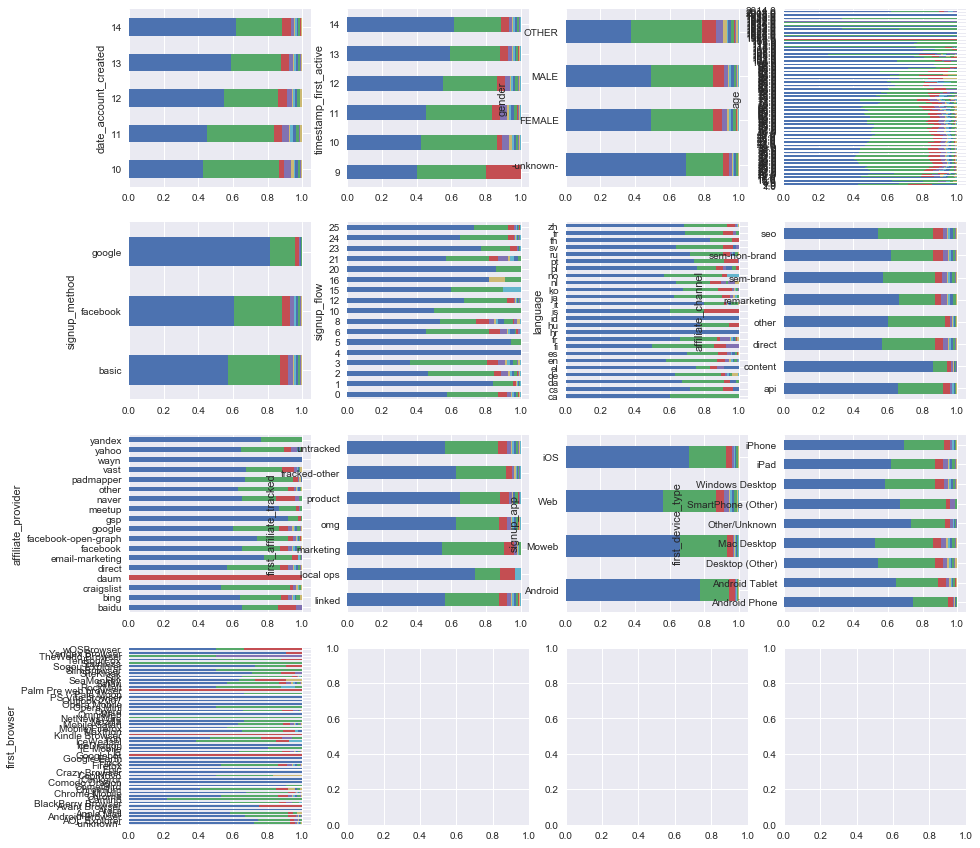

In [3]:
t = train.drop(['id','date_first_booking'], axis=1)
t.date_account_created = train.date_account_created.map(lambda x: x[2:4])
t.timestamp_first_active = train.timestamp_first_active.map(lambda x: x/10**10%100)
ycat = train.country_destination.unique()
cd = t.country_destination
t.drop('country_destination', axis=1, inplace=True)
xcat = t.columns.values

fig1, ax1 = plt.subplots(nrows=4, ncols=4, figsize=(15,15))
for i,cat in enumerate(xcat):
    bars = pd.crosstab(t[cat],cd).apply(lambda x: x/x.sum(), axis=1)
    bars[ycat].plot(kind='barh',stacked=True,legend=False, ax=ax1.reshape(-1)[i])

In [7]:
test.head()
test.date_first_booking.unique()

array([ nan])

In [4]:
both = pd.concat((train, test), axis=0, ignore_index=True)
both.drop('id',axis=1, inplace=True)

In [8]:
both.isnull().sum()/both.shape[0]

affiliate_channel          0.000000
affiliate_provider         0.000000
age                        0.424124
country_destination        0.225355
date_account_created       0.000000
date_first_booking         0.677340
first_affiliate_tracked    0.000000
first_browser              0.000000
first_device_type          0.000000
gender                     0.000000
language                   0.000000
signup_app                 0.000000
signup_flow                0.000000
signup_method              0.000000
timestamp_first_active     0.000000
dtype: float64

In [92]:
both.first_affiliate_tracked.unique()

array(['untracked', 'omg', nan, 'linked', 'tracked-other', 'product',
       'marketing', 'local ops'], dtype=object)

In [5]:
#==================================Turn features to number====================================================================
def feat2num(f):
    elements = f.unique()
    return dict(zip(elements, np.arange(len(elements))))

both.affiliate_channel = both.affiliate_channel.map(feat2num(both.affiliate_channel))
both.affiliate_provider = both.affiliate_provider.map(feat2num(both.affiliate_provider))
both.first_browser = both.first_browser.map(feat2num(both.first_browser))
both.first_device_type = both.first_device_type.map(feat2num(both.first_device_type))
both.language = both.language.map(feat2num(both.language))
both.signup_app = both.signup_app.map(feat2num(both.signup_app))
both.signup_method = both.signup_method.map(feat2num(both.signup_method))
both.first_affiliate_tracked = both.first_affiliate_tracked.map(feat2num(both.first_affiliate_tracked))
both.date_account_created = both.date_account_created.map(lambda x: x[2:4])
both.timestamp_first_active = both.timestamp_first_active.map(lambda x: x/10**10%100)
both.gender = both.gender.map(feat2num(both.gender))

In [6]:
both.drop(['country_destination','date_first_booking'], axis=1, inplace=True)
both.head()

,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,0,0,NaN,10,0,0,0,0,0,0,0,0,9
1,1,1,38.0,11,0,0,0,1,0,0,0,0,9
2,0,0,56.0,10,0,1,1,2,0,0,3,1,9
3,0,0,42.0,11,0,2,0,2,0,0,0,0,9
4,0,0,41.0,10,0,0,0,0,0,0,0,1,9


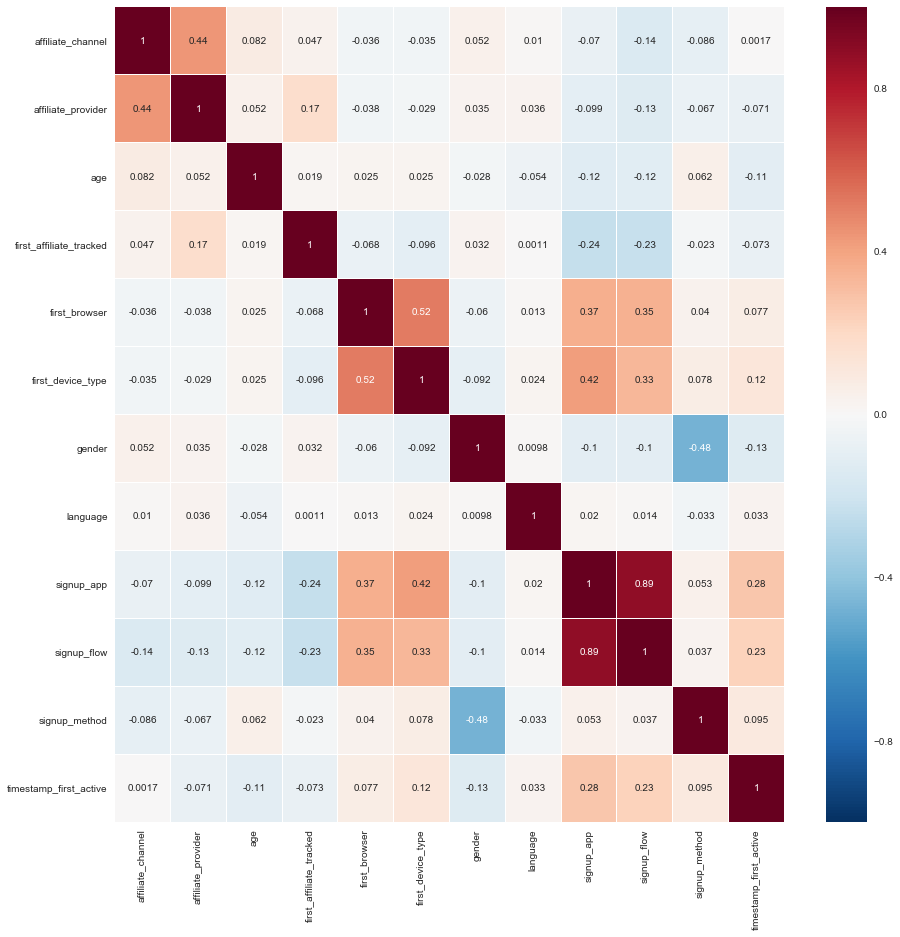

In [23]:
plt.figure(figsize=(15,15))
sns.heatmap(both.corr(),linewidths=0.1,annot=True)

In [30]:
both.signup_flow.values.shape

(275547L,)

In [ ]:
plt.plot([both.signup_app.values,both.signup_flow.values])

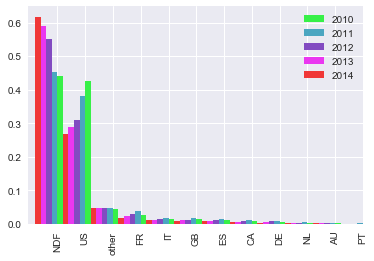

In [9]:
y = train.date_account_created.map(lambda x: x[0:4])
y10 = sum(y == '2010')
y11 = sum(y == '2011')
y12 = sum(y == '2012')
y13 = sum(y == '2013')
y14 = sum(y == '2014')

destination10 = train.loc[y == '2010', 'country_destination'].value_counts()/y10
destination11 = train.loc[y == '2011', 'country_destination'].value_counts()/y11
destination12 = train.loc[y == '2012', 'country_destination'].value_counts()/y12
destination13 = train.loc[y == '2013', 'country_destination'].value_counts()/y13
destination14 = train.loc[y == '2014', 'country_destination'].value_counts()/y14

destination10.plot(kind='bar',color='#37F048',position=0,label='2010',width=.2)
destination11.plot(kind='bar',color='#4BA6C1',position=1,label='2011',width=.2)
destination12.plot(kind='bar',color='#824BC1',position=2,label='2012',width=.2)
destination13.plot(kind='bar',color='#EA37F0',position=3,label='2013',width=.2)
destination14.plot(kind='bar',color='#F03737',position=4,label='2014',width=.2)
plt.legend()

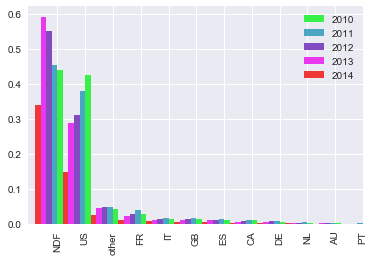

In [98]:
both.date_account_created = y.map({'2010':0, '2011':1, '2012':2, '2013':3, '2014':4})

,affiliate_channel,affiliate_provider,age,country_destination,date_account_created,date_first_booking,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,0,0,NaN,NDF,0,NaN,0,0,0,NaN,0,0,0,0,20090319043255
1,1,1,38.0,NDF,1,NaN,0,0,0,MALE,0,0,0,0,20090523174809
2,0,0,56.0,US,0,2010-08-02,0,1,1,FEMALE,0,0,3,1,20090609231247
3,0,0,42.0,other,1,2012-09-08,0,2,0,FEMALE,0,0,0,0,20091031060129
4,0,0,41.0,US,0,2010-02-18,0,0,0,NaN,0,0,0,1,20091208061105


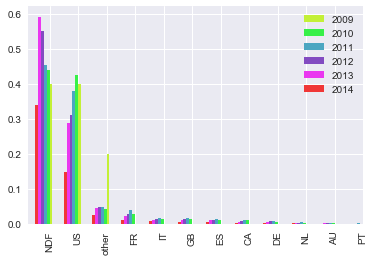

In [122]:
y = both.timestamp_first_active.map(lambda x: x/10**10)
y9 = sum(y == 2009)
y10 = sum(y == 2010)
y11 = sum(y == 2011)
y12 = sum(y == 2012)
y13 = sum(y == 2013)
y14 = sum(y == 2014)

destination9 = both.loc[y == 2009, 'country_destination'].value_counts()/y9
destination10 = both.loc[y == 2010, 'country_destination'].value_counts()/y10
destination11 = both.loc[y == 2011, 'country_destination'].value_counts()/y11
destination12 = both.loc[y == 2012, 'country_destination'].value_counts()/y12
destination13 = both.loc[y == 2013, 'country_destination'].value_counts()/y13
destination14 = both.loc[y == 2014, 'country_destination'].value_counts()/y14

destination9.plot(kind='bar',color='#C3F037',position=0,label='2009',width=.1)
destination10.plot(kind='bar',color='#37F048',position=1,label='2010',width=.1)
destination11.plot(kind='bar',color='#4BA6C1',position=2,label='2011',width=.1)
destination12.plot(kind='bar',color='#824BC1',position=3,label='2012',width=.1)
destination13.plot(kind='bar',color='#EA37F0',position=4,label='2013',width=.1)
destination14.plot(kind='bar',color='#F03737',position=5,label='2014',width=.1)
plt.legend()

In [125]:
both.timestamp_first_active = y.map({2009:9, 2010:10, 2011:11, 2012:12, 2013:13, 2014:14})

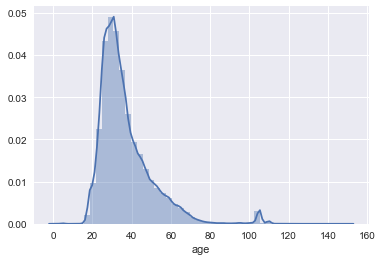

In [128]:
both.age.describe()
age = both.age[(both.age < 200)]
sns.distplot(age.dropna())

In [7]:
#==================================Train Age Models====================================================================
both.loc[both.age > 90, 'age'] = np.nan
both.loc[both.age < 16, 'age'] = np.nan
agete = both.loc[both.age.isnull()].drop('age', axis=1)
agetr = both.loc[both.age.notnull()]
agetr.loc[agetr.age<28, 'age'] = 0
agetr.loc[(agetr.age>1) & (agetr.age<33), 'age'] = 1
agetr.loc[(agetr.age>2) & (agetr.age<41), 'age'] = 2
agetr.loc[agetr.age>3, 'age'] = 3

agex = agetr.drop('age', axis=1)
agey = agetr.age

from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(agex)
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=500, max_depth=5)
random_forest.fit(x, agey)
ageprd = random_forest.predict(StandardScaler().fit_transform(agete))

both.loc[both.age.notnull(), 'age'] = agey.values
both.loc[both.age.isnull(), 'age'] = ageprd

C:\Users\dinsoson\Anaconda2\lib\site-packages\pandas\core\indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [8]:
both.head()

,affiliate_channel,affiliate_provider,age,date_account_created,first_affiliate_tracked,first_browser,first_device_type,gender,language,signup_app,signup_flow,signup_method,timestamp_first_active
0,0,0,2.0,10,0,0,0,0,0,0,0,0,9
1,1,1,2.0,11,0,0,0,1,0,0,0,0,9
2,0,0,3.0,10,0,1,1,2,0,0,3,1,9
3,0,0,3.0,11,0,2,0,2,0,0,0,0,9
4,0,0,3.0,10,0,0,0,0,0,0,0,1,9


In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()
scaler.fit(both)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [11]:
data = scaler.transform(both)

In [12]:
X_train = data[:train.shape[0],:]

In [13]:
country_dic = dict(zip(train.country_destination.unique(),range(len(train.country_destination.unique()))))

In [14]:
Y_train = train.country_destination.map(country_dic)

In [15]:
country_dic

{'AU': 11,
 'CA': 4,
 'DE': 10,
 'ES': 6,
 'FR': 3,
 'GB': 5,
 'IT': 7,
 'NDF': 0,
 'NL': 9,
 'PT': 8,
 'US': 1,
 'other': 2}

In [16]:
train80 = len(X_train)*9/10
reshuffle = np.random.permutation(len(X_train))
xx = X_train[reshuffle]
yy = Y_train[reshuffle]
xtrain = xx[:train80,]
ytrain = yy[:train80,]
xval = xx[train80:,]
yval = yy[train80:,]

In [17]:
from sklearn.metrics import precision_score

In [213]:
precision_score(ytrain,np.zeros(ytrain.shape),average='micro')

0.5834734904029496

In [18]:
# Random Forest parameters
rf_params = {
    'n_jobs': -1,
    'n_estimators': 500,
    'max_depth': 6,
    'random_state':826,
}

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(**rf_params)
rf.fit(xtrain,ytrain)
yprd = rf.predict(xval)
precision_score(yval,yprd,average='micro')

0.60165839033074109